# ***SELF-DESIGNING DENSE ARTIFICIAL NEURAL NETWORK***

***MNIST Fully Connected (Dense) ANN***

# Load dataset

Run once following line after each connection to runtime.

In [ ]:
!wget https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz

--2020-06-08 11:47:28--  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Resolving zenodo.org (zenodo.org)... 188.184.117.155
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz  62%[===========>        ]   3.51G  19.0MB/s    in 7m 12s  

2020-06-08 11:54:41 (8.33 MB/s) - Connection closed at byte 3769630720. Retrying.

--2020-06-08 11:54:42--  (try: 2)  https://zenodo.org/record/1203745/files/UrbanSound8K.tar.gz
Connecting to zenodo.org (zenodo.org)|188.184.117.155|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6023741708 (5.6G) [application/octet-stream]
Saving to: ‘UrbanSound8K.tar.gz’

UrbanSound8K.tar.gz   0%[                    ]  37.01M  2.72MB/s    eta 17m 17s

In [ ]:
!tar -zxvf UrbanSound8K.tar.gz

In [ ]:
%pip install keras tensorflow numpy mnist

**Parametrizing Model - Accuracy Calculator Design**

In [ ]:
accr = 0
a = 1
b = 1

while (accr<90):

    ###############################

    #Initialize parameters:

    dense_op_1 = 4*a   #ip layer
    dense_op_2 = 4*b   #hidden layer 1
    dense_op_3 = 4*a   #hidden layer 2
    dense_op_4 = 4*b   #hidden layer 3
    dense_op_5 = 10   #op layer

    dense_act_1 = 'relu'
    dense_act_2 = 'tanh'
    dense_act_3 = 'elu'
    dense_act_4 = 'sigmoid'
    dense_act_5 = 'softmax'

    ###############################

    import numpy as np
    import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical

    from keras.utils import plot_model

    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(dense_op_1, activation = dense_act_1, input_shape=(784,)),
      Dense(dense_op_2, activation = dense_act_2),
      Dense(dense_op_3, activation = dense_act_3),
      Dense(dense_op_4, activation = dense_act_4),
      Dense(dense_op_5, activation = dense_act_5),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=64,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Save the model to disk.
    model.save_weights('model.h5')

    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])


    #accuracy calc. using 128 test data
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")

    a = a+1
    b = b+1

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) 

# Check our predictions against the ground truths.
print(test_labels[:128]) 

#plot model
plot_model(model, to_file='model.png')

ModuleNotFoundError: ignored

In [ ]:
!pip install librosa==0.7.2

In [ ]:
import librosa
import numpy as np
y, sr = librosa.load('animal.wav')
mel_spect = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=1024)
mel_spect = librosa.power_to_db(mel_spect, ref=np.max)
librosa.display.specshow(mel_spect, y_axis='mel', fmax=8000, x_axis='time');

AttributeError: ignored

In [ ]:
import librosa
librosa.__version__

'0.6.3'

# ***UPDATED CODE #1***

Aşağıdaki kod network yapısındaki layer sayını ve her layeradki neuron sayısını kısatlamış ve her layerın neuron sayısını rastgele değiştirerek hedeflenen %90'lık test verisi doğuluğuna ulaşmaya çalışmaktadır. Rastgele generate edilen sayıların aynı olması durumunun önüne geçmek için while loop'un başındaki if yapısıyla filtre uygulanmıştır. elde edilen doğrluk değerlerinin daha sonra tablolaştırılması - analiz edilmesi - için accr_arr adındaki arraye saklanmaktadır.
**Ancak** ilk training sonrasında takıldığından sorunun çözülmesi gerekmekte :))
Sorunu gören olursa düzeltebilir mi?

**Yapılabilecek diğer değişiklikler:**
layer sayısını düşürüp bu layerlarda kullanılan activation function ları kendi arasında yine random olacak şekilde değiştirip performansa olan etkisini inceleyebiliriz. Her layerda bulunabilecek nöron sayısını da arttırabiliriz. Bu optimizasyon kodunu olı-uşturduktan sonra farklı datasetler üzerinde kendini optimize etmesini de deneyebiliriz.

In [ ]:
# run once following line
#%pip install keras tensorflow numpy mnist

import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.utils import plot_model

from random import seed
from random import randint
 
accr = 0

prev_comb = [0, 0, 0, 0]
new_comb = [0, 0, 0, 0]
accr_arr = [0.00]

while (accr<90):

  #Initialize parameters:

  seed(1)
  a = randint(0, 10)
  seed(1)
  b = randint(0, 10)
  seed(1)
  c = randint(0, 10)
  seed(1)
  d = randint(0, 10)

  new_comb = [a, b, c, d]

  if new_comb == prev_comb :
    seed(1)
    a = randint(0, 10)
    seed(1)
    b = randint(0, 10)
    seed(1)
    c = randint(0, 10)
    seed(1)
    d = randint(0, 10)

    new_comb = [a, b, c, d]

  else:
    dense_op_1 = 1*(a+1)   #ip layer
    dense_op_2 = 1*(b+1)   #hidden layer 1
    dense_op_3 = 1*(c+1)   #hidden layer 2
    dense_op_4 = 1*(d+1)   #hidden layer 3
    dense_op_5 = 10   #op layer

    dense_act_1 = 'relu'
    dense_act_2 = 'tanh'
    dense_act_3 = 'elu'
    dense_act_4 = 'sigmoid'
    dense_act_5 = 'softmax'

    ###############################

    import numpy as np
    import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical

    from keras.utils import plot_model

    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(dense_op_1, activation = dense_act_1, input_shape=(784,)),
      Dense(dense_op_2, activation = dense_act_2),
      Dense(dense_op_3, activation = dense_act_3),
      Dense(dense_op_4, activation = dense_act_4),
      Dense(dense_op_5, activation = dense_act_5),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=64,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Save the model to disk.
    model.save_weights('model.h5')

    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])


    #accuracy calc.
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")

    prev_comb = new_comb
    accr_arr.append(accr)

# Print our model's predictions.
print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

# Check our predictions against the ground truths.
print(test_labels[:15]) # [7, 2, 1, 0, 4]


#plot model
plot_model(model, to_file='model.png')

# ***UPDATED CODE #2***

## Initial assumptions - constraints:

*   Hidden layer number: 2
*   Max neuron num-per-layer: 32
*   Targeted min. accuracy: 90%

### ***Actv. Func. Selection***
To determine which activation function to use in which layer, mostly used ones are chosen and two of those are used in seperate trainings. The highest test accuracy yielding one is selected. Also for a better comperison each layer's neuron number is fixed to 8, since we desire to keep neuron density lower than 50% of defined upper limit.

**Note:** The output layer with *'softmax'* activation function is kept the same for all trainings.

 ***Side Note:*** *Test Accuracy Calculation* is done by comparing the TRUE value of given data from test set and the made prediction by NN for the first 128 samples. Since the data in *test* and *train* sets' elements are assigned randomly from the initial dataset, the placement of validation data in the set is not decisive.

In [ ]:
import matplotlib.pyplot as plt

act_func_list = ['relu', 'tanh', 'sigmoid', 'softmax']

accr = 0

prev_comb = [0, 0, 0, 0]
new_comb = [0, 0, 0, 0]
accr_arr = []


for j in range(4):
  for k in range(4):
    func_1 = act_func_list[j]
    func_2 = act_func_list[k]

    # The full neural network code!
    ###############################
    import numpy as np
    import mnist
    from keras.models import Sequential
    from keras.layers import Dense
    from keras.utils import to_categorical

    from keras.utils import plot_model

    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(8, activation=func_1, input_shape=(784,)),
      Dense(8, activation=func_2),
      Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])

    #accuracy calc.
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")
    print("obtained with", func_1, "and", func_2, "in respective layers")
    prev_comb = new_comb
    accr_arr.append(accr)

    # Save the model to disk.
    #model.save_weights('model.h5')

    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    #predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    #print(test_labels[:5]) # [7, 2, 1, 0, 4]

#plot accuracy for observations
plt.plot(accr_arr)
plt.ylabel('Test Accuracies')
plt.xlabel('Combined Activation Function Case Indexes')
plt.show()
#plot model
#plot_model(model, to_file='model.png')

# ***UPDATED CODE #2.1***

## What's NEW:

*   Simplified inspection
*   Easy to follow steps
*   Auto-analyisis
*   Finds best result
*   Saves best result
*   Shows best result
 


Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.9719 - accuracy: 0.6850
Epoch 2/5
60000/60000 [==============================] - 2s 41us/step - loss: 0.5573 - accuracy: 0.8348
Epoch 3/5
60000/60000 [==============================] - 2s 39us/step - loss: 0.4785 - accuracy: 0.8607
Epoch 4/5
60000/60000 [==============================] - 2s 38us/step - loss: 0.4344 - accuracy: 0.8742
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
test acc = 89.84375 %
obtained with relu and relu in respective layers
|||||||||||||||||||||||||||||||||-- completed case index:  0 --||||||||||||||||||||||||||||||||||

Epoch 1/5
60000/60000 [==============================] - 2s 40us/step - loss: 1.0305 - accuracy: 0.6509
Epoch 2/5
60000/60000 [==============================] - 2s 37us/step - loss: 0.6314 - accuracy: 0.8078
Epoch 3/5
60000/60000 [==============================] - 2s 40us/step - loss: 0.5741 - accuracy: 0.8286
Epoch 4/5
60000/60000 [=========

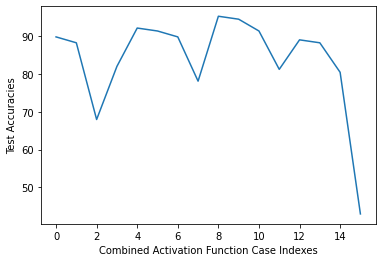

highest accuracy obtained @ case index: # 12 with test accuracy of 89.0625 %
Activation func of 1st hidden layer:  softmax
Activation func of 2nd hidden layer:  relu


In [ ]:
import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.utils import plot_model
import matplotlib.pyplot as plt

act_func_list = ['relu', 'tanh', 'sigmoid', 'softmax']
act_func_index = [0,0]

accr = 0
prev_accr = 0.00

prev_comb = [0, 0, 0, 0]
new_comb = [0, 0, 0, 0]
accr_arr = []

counter = 0
counter_up = 0

for j in range(4):
  for k in range(4):
    func_1 = act_func_list[j]
    func_2 = act_func_list[k]

    # The full neural network code!
    ###############################


    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(8, activation=func_1, input_shape=(784,)),
      Dense(8, activation=func_2),
      Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])

    #accuracy calc.
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")
    print("obtained with", func_1, "and", func_2, "in respective layers")
    print("|||||||||||||||||||||||||||||||||-- completed case index: ", counter, "--||||||||||||||||||||||||||||||||||")
    print()
    prev_comb = new_comb
    accr_arr.append(accr)

    if prev_accr < accr:
      # Save the model to disk.
      model.save_weights('model.h5')
      act_func_index[0] = j
      act_func_index[1] = k
      counter_up = counter

    counter = counter + 1
    prev_accr = accr
    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    #predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    #print(test_labels[:5]) # [7, 2, 1, 0, 4]

#plot accuracy for observations
plt.plot(accr_arr)
plt.ylabel('Test Accuracies')
plt.xlabel('Combined Activation Function Case Indexes')
plt.show()
#plot model
plot_model(model, to_file='model.png')
print("highest accuracy obtained @ case index: #", counter_up, "with test accuracy of", accr_arr[counter_up], "%")
print("Activation func of 1st hidden layer: ", act_func_list[act_func_index[0]])
print("Activation func of 2nd hidden layer: ", act_func_list[act_func_index[1]])

# ***UPDATED CODE #3***

## ***Neuron Number Selection***

After determination of activation functions in each layer. for further optimizations, required minimum number of neurons in each layer - and thus in overall network - still resulting in the targeted test accuracy is computed by the following code.

# ***Specs:***


*   Takes required parameters (act. func.) from previously run program
*   Easy tracking during the model training
*   Visualization of results
*   Self-tracking for test accuracy
*   Stops when target accuracy a-obtained - No further model design and training
*   Anti-overfitting
*   Through the complete possible combinations in designs and their results, if target not achieved warns and guides for posible solution
*   If the above is the case, then shows the best resulting model parameters and achived highest test accuracy.







In the following code the assumtion for max. neuron per layer is 4. Its couse is to determine the effect of severe neuron reduction on the network and inspect network's ability to make predictions with less number of neurons.

Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 2.3016 - accuracy: 0.1117
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 2s 36us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
test acc = 11.71875 %
obtained with 1 and 1 neurons in respective layers
|||||||||||||||||||||||||||||||||-- completed case index:  0 --||||||||||||||||||||||||||||||||||

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 2.3043 - accuracy: 0.1124
Epoch 2/5
60000/60000 [==============================] - 2s 36us/step - loss: 2.3014 - accuracy: 0.1122
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3014 - accuracy: 0.1124
Epoch 4/5
60000/60000 [=======

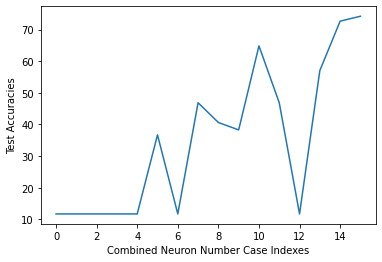

highest accuracy obtained @ case index: # 15 with test accuracy of 74.21875 %
Number of neurons in 1st hidden layer:  4
Number of neurons in 2nd hidden layer:  4


Please re-run the program with higher upper-limit of neuron number for each layer


In [ ]:

import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.utils import plot_model
import matplotlib.pyplot as plt

####################################################
#
#   Please assign the max. neuron number per layer
upper_limit = 4
####################################################

##########################################################
#obtained activation func. types from prev. opt. program
lyr_1_func = act_func_list[act_func_index[0]]
lyr_2_func = act_func_list[act_func_index[1]]
##########################################################

accr = 0
prev_accr = 0.00

prev_comb = [0, 0, 0, 0]
new_comb = [0, 0, 0, 0]
accr_arr = []

counter = 0
counter_up = 0

nrn_num = []
for p in range (upper_limit):
  nrn_num.append(p+1)

nrn_index_1 = 0
nrn_index_2 = 0


for g in range(upper_limit):
  for h in range(upper_limit):

    # The full neural network code!
    ###############################

    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(g+1, activation=lyr_1_func, input_shape=(784,)),
      Dense(h+1, activation=lyr_2_func),
      Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])

    #accuracy calc.
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")
    print("obtained with", g+1, "and", h+1, "neurons in respective layers")
    print("|||||||||||||||||||||||||||||||||-- completed case index: ", counter, "--||||||||||||||||||||||||||||||||||")
    print()
    prev_comb = new_comb
    accr_arr.append(accr)

    if prev_accr < accr:
      # Save the model to disk.
      model.save_weights('model_1.h5')
      nrn_index_1 = g
      nrn_index_2 = h
      counter_up = counter
      if accr >= 90:
        break

    counter = counter + 1
    prev_accr = accr
    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    #predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    #print(test_labels[:5]) # [7, 2, 1, 0, 4]

#plot accuracy for observations
plt.plot(accr_arr)
plt.ylabel('Test Accuracies')
plt.xlabel('Combined Neuron Number Case Indexes')
plt.show()
#plot model
plot_model(model, to_file='model.png')
print("highest accuracy obtained @ case index: #", counter_up, "with test accuracy of", accr_arr[counter_up], "%")
print("Number of neurons in 1st hidden layer: ", nrn_num[nrn_index_1])
print("Number of neurons in 2nd hidden layer: ", nrn_num[nrn_index_2])
print()
print()
if accr_arr[counter_up] < 90:
  print("Please re-run the program with higher upper-limit of neuron number for each layer")

## As ındicated in the last line of the above results, the upper limit (max. # of neurons-per-layer) needed to be increased to meet the **targeted** *test accuracy*.

*In the following re-run of the program coincidently the targeted 90% test accuracy is obtained @ the last combination. If the target was achieved in earlier combination, the program would not contnue any further more complex combinations and show the results immidiately.
In each rerun the training depends several random parameters - as expected in NN trainings - resulting in test accuracy fluctuations.

Epoch 1/5
60000/60000 [==============================] - 2s 37us/step - loss: 2.3016 - accuracy: 0.1121
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 2s 37us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 4/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3013 - accuracy: 0.1124
Epoch 5/5
10000/10000 [==============================] - 0s 21us/step
test acc = 11.71875 %
obtained with 1 and 1 neurons in respective layers
|||||||||||||||||||||||||||||||||-- completed case index:  0 --||||||||||||||||||||||||||||||||||

Epoch 1/5
60000/60000 [==============================] - 2s 36us/step - loss: 2.3063 - accuracy: 0.1124
Epoch 2/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3016 - accuracy: 0.1124
Epoch 3/5
60000/60000 [==============================] - 2s 35us/step - loss: 2.3017 - accuracy: 0.1124
Epoch 4/5
60000/60000 [=======

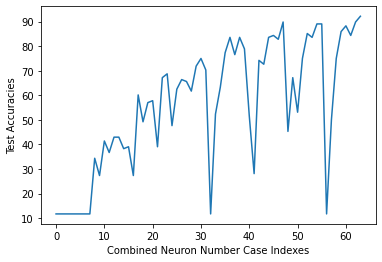

highest accuracy obtained @ case index: # 63 with test accuracy of 92.1875 %
Number of neurons in 1st hidden layer:  8
Number of neurons in 2nd hidden layer:  8




In [ ]:

import numpy as np
import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.utils import to_categorical

from keras.utils import plot_model
import matplotlib.pyplot as plt

####################################################
#
#   Please assign the max. neuron number per layer
upper_limit = 8
####################################################

##########################################################
#obtained activation func. types from prev. opt. program
lyr_1_func = act_func_list[act_func_index[0]]
lyr_2_func = act_func_list[act_func_index[1]]
##########################################################

accr = 0
prev_accr = 0.00

prev_comb = [0, 0, 0, 0]
new_comb = [0, 0, 0, 0]
accr_arr = []

counter = 0
counter_up = 0

nrn_num = []
for p in range (upper_limit):
  nrn_num.append(p+1)

nrn_index_1 = 0
nrn_index_2 = 0


for g in range(upper_limit):
  for h in range(upper_limit):

    # The full neural network code!
    ###############################

    train_images = mnist.train_images()
    train_labels = mnist.train_labels()
    test_images = mnist.test_images()
    test_labels = mnist.test_labels()

    # Normalize the images.
    train_images = (train_images / 255) - 0.5
    test_images = (test_images / 255) - 0.5

    # Flatten the images.
    train_images = train_images.reshape((-1, 784))
    test_images = test_images.reshape((-1, 784))

    # Build the model.
    model = Sequential([
      Dense(g+1, activation=lyr_1_func, input_shape=(784,)),
      Dense(h+1, activation=lyr_2_func),
      Dense(10, activation='softmax'),
    ])

    # Compile the model.
    model.compile(
      optimizer='adam',
      loss='categorical_crossentropy',
      metrics=['accuracy'],
    )

    # Train the model.
    model.fit(
      train_images,
      to_categorical(train_labels),
      epochs=5,
      batch_size=32,
    )

    # Evaluate the model.
    model.evaluate(
      test_images,
      to_categorical(test_labels)
    )

    # Predict on the first 5 test images.
    predictions = model.predict(test_images[:128])

    #accuracy calc.
    neq_cntr = 0
    for i in range(128):
      if np.argmax(predictions, axis=1)[i] != test_labels[i] :
        neq_cntr = neq_cntr+1

    accr = ((128-neq_cntr)/128)*100
    print("test acc =", accr, "%")
    print("obtained with", g+1, "and", h+1, "neurons in respective layers")
    print("|||||||||||||||||||||||||||||||||-- completed case index: ", counter, "--||||||||||||||||||||||||||||||||||")
    print()
    prev_comb = new_comb
    accr_arr.append(accr)

    if prev_accr < accr:
      # Save the model to disk.
      model.save_weights('model_1.h5')
      nrn_index_1 = g
      nrn_index_2 = h
      counter_up = counter
      if accr >= 90:
        break

    counter = counter + 1
    prev_accr = accr
    # Load the model from disk later using:
    # model.load_weights('model.h5')

    # Predict on the first 5 test images.
    #predictions = model.predict(test_images[:5])

    # Print our model's predictions.
    #print(np.argmax(predictions, axis=1)) # [7, 2, 1, 0, 4]

    # Check our predictions against the ground truths.
    #print(test_labels[:5]) # [7, 2, 1, 0, 4]

#plot accuracy for observations
plt.plot(accr_arr)
plt.ylabel('Test Accuracies')
plt.xlabel('Combined Neuron Number Case Indexes')
plt.show()
#plot model
plot_model(model, to_file='model.png')
print("highest accuracy obtained @ case index: #", counter_up, "with test accuracy of", accr_arr[counter_up], "%")
print("Number of neurons in 1st hidden layer: ", nrn_num[nrn_index_1])
print("Number of neurons in 2nd hidden layer: ", nrn_num[nrn_index_2])
print()
print()
if accr_arr[counter_up] < 90:
  print("Please re-run the program with higher upper-limit of neuron number for each layer")